In [6]:
!unzip /content/mimic-iii-clinical-database-demo-1.4.zip

Archive:  /content/mimic-iii-clinical-database-demo-1.4.zip
   creating: mimic-iii-clinical-database-demo-1.4/
  inflating: mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/CALLOUT.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/CAREGIVERS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/CPTEVENTS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/DATETIMEEVENTS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/D_CPT.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/D_ICD_PROCEDURES.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/D_ITEMS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv  
  inflating: mimic-iii-clinical-database-demo-1.4/DRGCODES.csv  
  inflating: 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
from datetime import datetime 


# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from matplotlib.ticker import StrMethodFormatter

In [2]:
df_raw = pd.read_csv('/content/drive/MyDrive/NOTEEVENTS-2.csv.gz', compression='gzip', low_memory=False)
df_raw_b = df_raw.copy()
print(df_raw.shape)

(2083180, 9)


In [3]:
df_raw.head(5)

,row_id,subject_id,hadm_id,chartdate,category,description,cgid,iserror,text
0,776,20007,188442.0,2183-10-29 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2183-9-25**] Dischar...
1,777,20007,193793.0,2184-01-20 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2184-1-16**] Dischar...
2,778,59883,118446.0,2103-04-18 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2103-4-11**] ...
3,779,17043,157985.0,2103-10-11 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2103-10-7**] Dischar...
4,785,7019,189488.0,2131-04-06 00:00:00,Discharge summary,Report,NaN,NaN,Admission Date: [**2131-4-2**] D...


In [4]:
df_raw_b.sample(frac=0.5, replace=True, random_state=1)

,row_id,subject_id,hadm_id,chartdate,category,description,cgid,iserror,text
128037,137684,54691,165060.0,2121-02-12 00:00:00,ECG,Report,NaN,NaN,Sinus rhythm. Probable left ventricular hyper...
491755,492913,58702,114246.0,2114-11-12 00:00:00,Nursing,Nursing Progress Note,20063.0,NaN,52-year-old female with ALL s/p chemo and sing...
470924,472465,93640,175706.0,2166-08-13 00:00:00,Physician,Intensivist Note,18158.0,NaN,"SICU HPI: 69M w/ odontoid fracture, C3-C..."
1840200,1816728,9872,103627.0,2156-01-28 00:00:00,Nursing/other,Report,15064.0,NaN,NPN Days continued 7am-7pm #2 O: Infant remain...
491263,493574,56468,187437.0,2161-09-30 00:00:00,Nursing,Nursing Progress Note,14435.0,NaN,76yo female s/p witnessed fall backwards down ...
...,...,...,...,...,...,...,...,...,...
509675,515840,40476,139399.0,2183-01-27 00:00:00,Nursing,Nursing Progress Note,17745.0,NaN,"27 y M struck in head by baseball bat; no LOC,..."
1236351,1243307,1563,190933.0,2179-05-04 00:00:00,Radiology,CT C-SPINE W/O CONTRAST,NaN,NaN,[**2179-5-4**] 1:16 PM CT C-SPINE W/O CONTRAS...
663644,668101,54382,166909.0,2125-05-19 00:00:00,Physician,Intensivist Note,14116.0,NaN,"TSICU HPI: 23 yM stabbed 3 x, intubated ..."
823793,831708,23566,133880.0,2161-08-17 00:00:00,Radiology,CHEST (PORTABLE AP),NaN,NaN,[**2161-8-17**] 8:58 PM CHEST (PORTABLE AP) ...


In [7]:

# Load data and peak into the data
admissions=pd.read_csv('/content/mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')
admissions.sample(5)
print(admissions.columns.tolist())

['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']


In [8]:

# Subset just the dataframe to work only with the important columns
admissions = admissions[['row_id', 'subject_id', 'hadm_id', 'admittime',
                         'dischtime','deathtime', 'admission_type']]

In [9]:
# Extract index values 
emerg_urg_idx = admissions[(admissions['admission_type'] == 'EMERGENCY') | 
                              (admissions['admission_type'] == 'URGENT')].index.values
# Subset the dataframe
admissions = admissions.loc[emerg_urg_idx, :]

[Text(0, 0.5, 'admission_types'),
 Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'ADMISSION TYPES')]

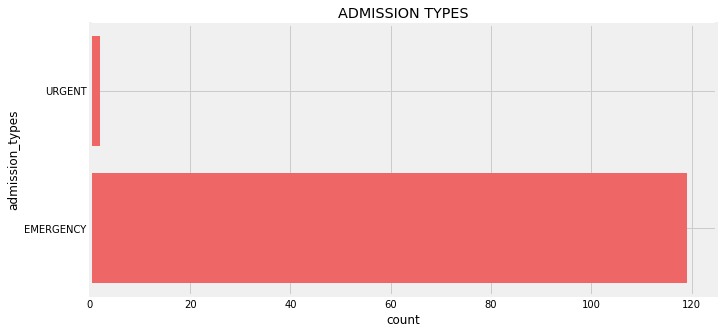

In [10]:
admission_types = admissions['admission_type'].value_counts().to_dict()
names = list(admission_types.keys())
values = list(admission_types.values())

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(names, values, color='#EE6666')
ax.set(title='ADMISSION TYPES', ylabel='admission_types', xlabel='count')


In [11]:
# Select patient with no deathtime given assuming they are alive
admissions = admissions[admissions['deathtime'].isnull()]

#Drop the deathtime column since it is only a null column
admissions.drop(['deathtime'], axis=1, inplace=True)
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,admission_type
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,EMERGENCY
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,EMERGENCY
5,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,EMERGENCY
7,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,EMERGENCY
8,12282,10032,140372,2138-04-02 19:52:00,2138-04-15 14:35:00,EMERGENCY


In [12]:
admissions[['admittime', 'dischtime']] = admissions[['admittime', 'dischtime']].apply(
    pd.to_datetime, format='%Y-%m-%d %H:%M:%S', errors='coerce')

# sort by subject_ID and admission date
admissions = admissions.sort_values(['subject_id','admittime']).reset_index(drop=True)

In [13]:
# Next 'ADMITTIME'
admissions['NEXT_ADMITTIME'] = admissions.groupby('subject_id')[
    'admittime'].shift(-1)
# Next 'ADMITTYPE'
admissions['NEXT_ADMISSION_TYPE'] = admissions.groupby(
    'subject_id')['admission_type'].shift(-1)

In [14]:
rows = admissions[admissions['NEXT_ADMISSION_TYPE']
                    == 'elective'].index.values
admissions.loc[rows, 'NEXT_ADMISSION_TYPE'] = np.NaN
admissions.loc[rows, 'NEXT_ADMITTIME'] = pd.NaT

In [15]:
# sort by subject_ID and admission date
# it is safer to sort right before the fill incase something changed the order above
admissions = admissions.sort_values(['subject_id', 'admittime'])

# back fill (this will take a little while)
admissions[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']] = admissions.groupby(
    ['subject_id'])[['NEXT_ADMITTIME', 'NEXT_ADMISSION_TYPE']].fillna(method='bfill')

In [16]:
# calculate the number of days between discharge and next admission
admissions['DAYS_NEXT_ADMIT'] = (
    admissions['NEXT_ADMITTIME'] - admissions.dischtime).dt.total_seconds()/(24*60*60)

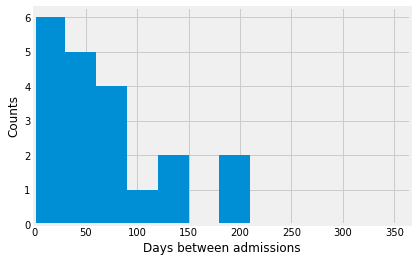

In [17]:
plt.hist(admissions.loc[~admissions.DAYS_NEXT_ADMIT.isnull(), 'DAYS_NEXT_ADMIT'], bins=range(0, 365, 30))
plt.xlim([0, 365])
plt.xlabel('Days between admissions')
plt.ylabel('Counts')
plt.show()

In [1]:
# Load the csv file
notes_raw=pd.read_csv('/content/drive/MyDrive/NOTEEVENTS-2.csv.gz', compression='gzip', low_memory=False)
notes=notes_raw.copy()
print(notes.columns.tolist())

NameError: ignored

In [46]:
notes['subject_id'].isin(admissions['subject_id']).astype('int64').sum()

0

{}


[Text(0, 0.5, 'categories'),
 Text(0.5, 0, 'count'),
 Text(0.5, 1.0, 'Distribution of Notes Categories')]

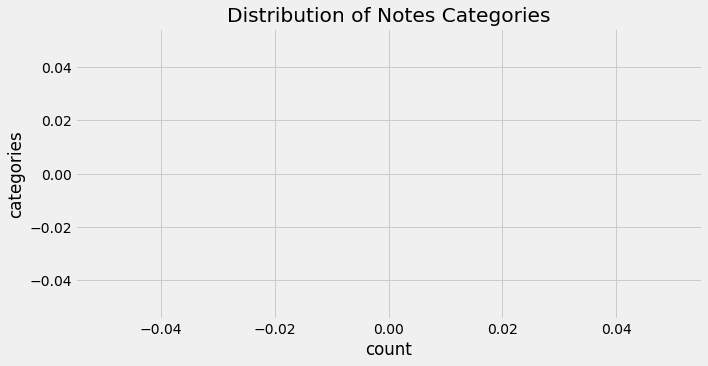

In [48]:
notes_categories = notes['category'].value_counts().to_dict()
print(notes_categories)

# Plot a count plot
categories = list(notes_categories.keys())
count = list(notes_categories.values())

figure, ax = plt.subplots(figsize=(10, 5))
ax.barh(categories, count, color='#EE6666')
ax.set(title = 'Distribution of Notes Categories', xlabel='count' , ylabel='categories')

In [49]:
notes_subset = notes[notes['category']== 'Discharge summary']
print(notes_subset.head())

Empty DataFrame
Columns: [row_id, subject_id, hadm_id, chartdate, charttime, storetime, category, description, cgid, iserror, text]
Index: []


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[Text(0, 0.5, 'Normed Frequency'),
 Text(0.5, 0, 'Number of Notes'),
 Text(0.5, 1.0, 'Distribution of number of notes per patient')]

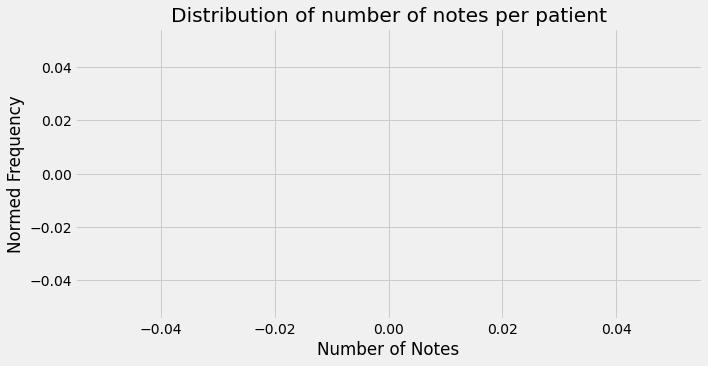

In [50]:
# plot the distribution of number of notes per patient
num_notes_patients = notes_subset.groupby(['subject_id','hadm_id'])['text'].count()

figure, ax = plt.subplots(figsize=(10,5))
ax.hist(num_notes_patients, bins=10, density = True, color='#EE6666')
ax.set(title='Distribution of number of notes per patient', xlabel= 'Number of Notes', ylabel = "Normed Frequency")

In [51]:
merged_df = pd.merge(admissions, notes_subset, on=['subject_id','hadm_id'], how='left')

merged_df.shape

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   row_id_x             81 non-null     int64         
 1   subject_id           81 non-null     int64         
 2   hadm_id              81 non-null     int64         
 3   admittime            81 non-null     datetime64[ns]
 4   dischtime            81 non-null     datetime64[ns]
 5   admission_type       81 non-null     object        
 6   NEXT_ADMITTIME       21 non-null     datetime64[ns]
 7   NEXT_ADMISSION_TYPE  21 non-null     object        
 8   DAYS_NEXT_ADMIT      21 non-null     float64       
 9   row_id_y             0 non-null      object        
 10  chartdate            0 non-null      object        
 11  charttime            0 non-null      object        
 12  storetime            0 non-null      object        
 13  category             0 non-null      

In [52]:
merged_df['text'].isnull().sum()

81

In [53]:
merged_df.dropna(subset=['text'], inplace=True)

In [54]:
def remove_special_text(text):
    import string
    punc_list=string.punctuation + '0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, ""))
    text = text.lower().translate(t)
    text = text.replace('\n', " ")
    text = text.replace('\r', ' ')
    text = text.replace("(<br/>)", " ")
    text = text.replace('(<a).*(>).*(</a>)',' ')
    text = text.replace('(&amp)', ' ')
    text = text.replace('(&gt)', ' ')
    text = text.replace('(&lt)', ' ')
    text = text.replace('(\xa0)', ' ')
    return text

In [57]:
merged_df['TEXT_CLEAN'] = [remove_special_text(str(i)) for i in merged_df['text']]

In [61]:
merged_df['TEXT_CLEAN']


Series([], Name: TEXT_CLEAN, dtype: float64)

In [62]:
merged_df['Label'] = [1 if entry <30 else 0 for entry in merged_df['DAYS_NEXT_ADMIT']]

In [64]:
merged_df.drop(['row_id_x',
                'subject_id',
                'hadm_id',
                'admittime',
                'dischtime',
                'admission_type',
                'NEXT_ADMITTIME',
                'NEXT_ADMISSION_TYPE',
                'DAYS_NEXT_ADMIT',
                'category',
                'cgid',
                'chartdate',
                'charttime',
                'description',
                'iserror',
                'row_id_y',
                'storetime',
                'text'],axis=1, inplace=True)

In [65]:
import feather
feather.write_dataframe(merged_df,'cleaned.feather')

In [66]:
merged_df = feather.read_dataframe('cleaned.feather')

In [67]:
merged_df.head()

,TEXT_CLEAN,Label


In [69]:
# Class 1
class_1_subset = merged_df[merged_df['Label']==1]

In [70]:
# Class 0
class_0 = merged_df[merged_df['Label'] == 0]
class_0_subset = class_0.sample(len(class_1_subset))

In [72]:
class_0_subset.shape, class_1_subset.shape

((0, 2), (0, 2))

In [73]:
# Concatenate the dataframes
small_df = pd.concat([class_0_subset, class_1_subset], ignore_index=True)
#small_df
assert small_df.shape[0] == class_0_subset.shape[0] + class_1_subset.shape[0]

In [75]:
import pickle
small_df.to_pickle('small_df.pickle')

In [76]:
small_df.columns

Index(['TEXT_CLEAN', 'Label'], dtype='object')

In [77]:
print('The percent of observations belonging to class 0 are {}'.format(
    100 * len(merged_df[merged_df['Label'] == 0])/merged_df.shape[0]))
print('The percent of observations belonging to class 1 are {}'.format(
    100 * len(merged_df[merged_df['Label'] == 1])/merged_df.shape[0]))

ZeroDivisionError: ignored